In [1]:
# import libraries

import pandas as pd
import seaborn as sns # data visualization library based on matplotlib\
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we will create

In [2]:
'''
purpose: find the most correlated factor to high gross revenue. 
'''

'\npurpose: find the most correlated factor to high gross revenue. \n'

In [3]:
# read in the data
df = pd.read_csv('C:/Users/janew/Downloads/movies.csv')

In [4]:
df = df.dropna(how='any',axis=0)  # to drop any nan values

In [5]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [6]:
# See if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [7]:
# Data types for columns
df.dtypes.sort_values()

year             int64
score          float64
votes          float64
budget         float64
gross          float64
runtime        float64
name            object
rating          object
genre           object
released        object
director        object
writer          object
star            object
country         object
company         object
yearcorrect     object
dtype: object

In [8]:
# change data types of columns

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df['runtime'] = df['runtime'].astype('Int64')
df['votes'] = df['votes'].astype('Int64')



In [9]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [10]:
pd.set_option('display.max_rows', None) # set the max rows to display to none, meaning showing all rows from the df. 

In [11]:
# Drop any duplicates

df = df.drop_duplicates()

In [12]:
df.tail()

name     rating   genre  year  \
5640                 Tanner Hall          R   Drama  2009   
2434  Philadelphia Experiment II      PG-13  Action  1993   
3681                Ginger Snaps  Not Rated   Drama  2000   
272                     Parasite          R  Horror  1982   
3203                  Trojan War      PG-13  Comedy  1997   

                            released  score  votes             director  \
5640       January 15, 2015 (Sweden)    5.8   3500  Francesca Gregorini   
2434      June 4, 1994 (South Korea)    4.5   1900     Stephen Cornwell   
3681           May 11, 2001 (Canada)    6.8  43000         John Fawcett   
272   March 12, 1982 (United States)    3.9   2300         Charles Band   
3203        October 1, 1997 (Brazil)    5.7   5800         George Huang   

                       writer             star        country    budget  \
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3203                Andy Burg     Will Friedle  United States  15000000   

      gross                    company  runtime yearcorrect  
5640   5073           Two Prong Lesson       96        2015  
2434   2970           Trimark Pictures       97        1994  
3681   2554  Copperheart Entertainment      108        2001  
272    2270           Embassy Pictures       85        1982  
3203    309                   Daybreak       85        1997

In [13]:
# Budget high correlation
# Company high correlation


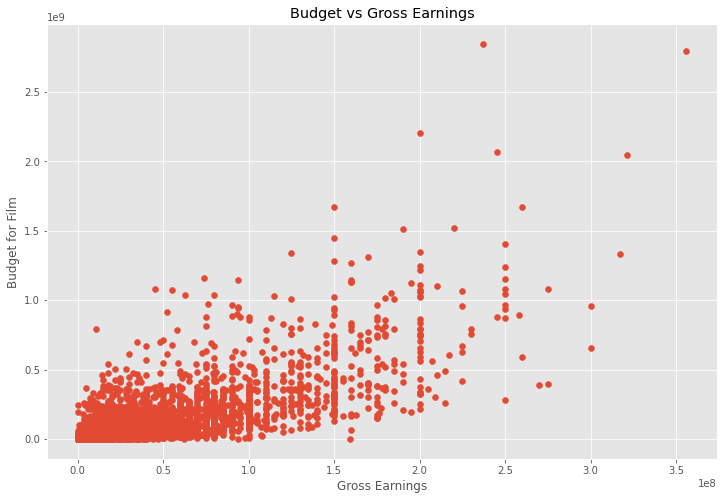

In [14]:
# Scatter plot with Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [15]:
df = df.sort_values(by = ['gross'], ascending = False)

In [16]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox      162        2009  
7445  2797501328         Marvel Studios      181        2019  
3045  2201647264  Twentieth Century Fox      194        1997  
6663  2069521700              Lucasfilm      138        2015  
7244  2048359754         Marvel Studios      149        2018

In [17]:
df['gross'] = df['gross'].astype('float64')
df['budget'] = df['budget'].astype('float64')

<AxesSubplot:xlabel='budget', ylabel='gross'>

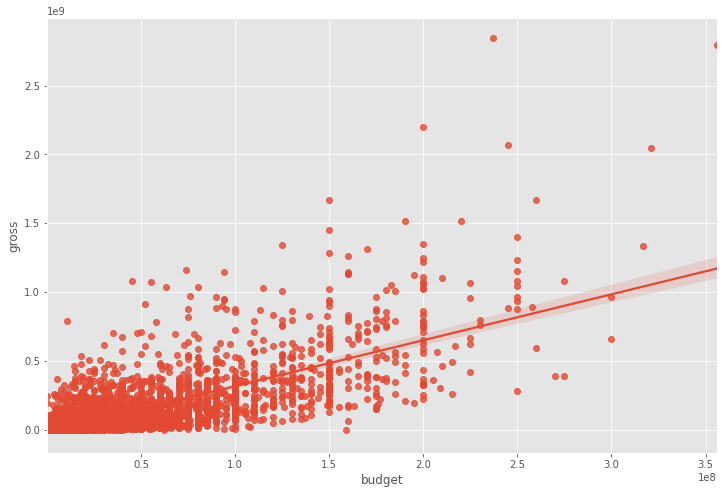

In [18]:
sns.regplot(x='budget', y='gross', data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

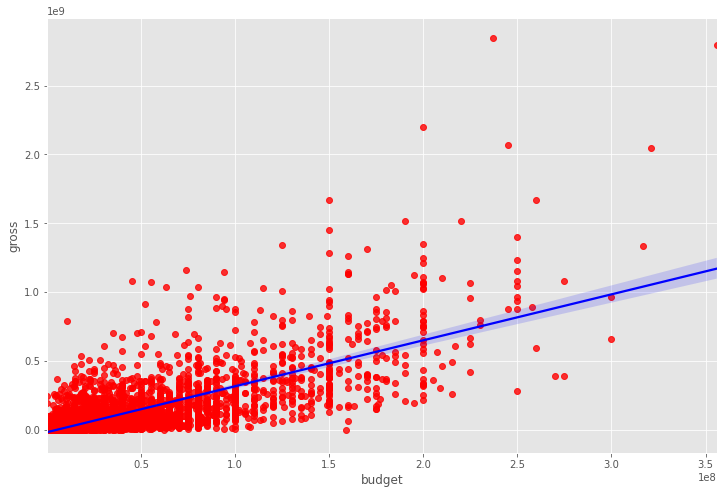

In [19]:
# Plot Budget vs Gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [20]:
# Look at correlation

In [21]:
df.corr(method = 'pearson') # only works on numerical fields
# corr() default method is pearson, other methods: kendall, spearman
# budget and gross have a correlation of 0.74, pretty correlation compared to others

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [22]:
# High correlation between budget and gross

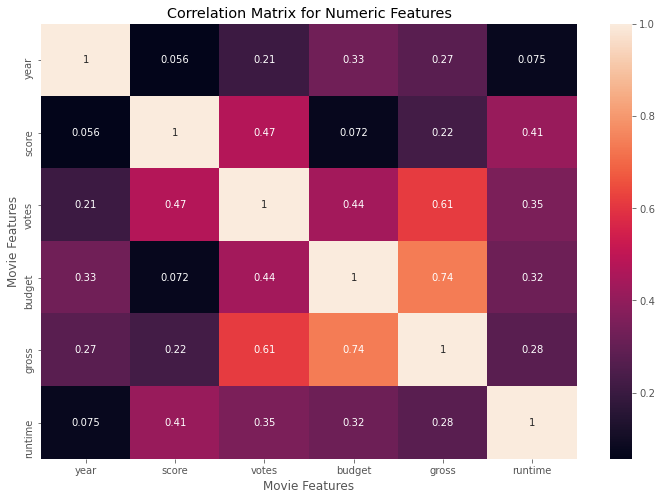

In [23]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [24]:
# Look at Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime yearcorrect  
5445  2.847246e+09  Twentieth Century Fox      162        2009  
7445  2.797501e+09         Marvel Studios      181        2019  
3045  2.201647e+09  Twentieth Century Fox      194        1997  
6663  2.069522e+09              Lucasfilm      138        2015  
7244  2.048360e+09         Marvel Studios      149        2018

In [25]:
df_numerised = df.copy()

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

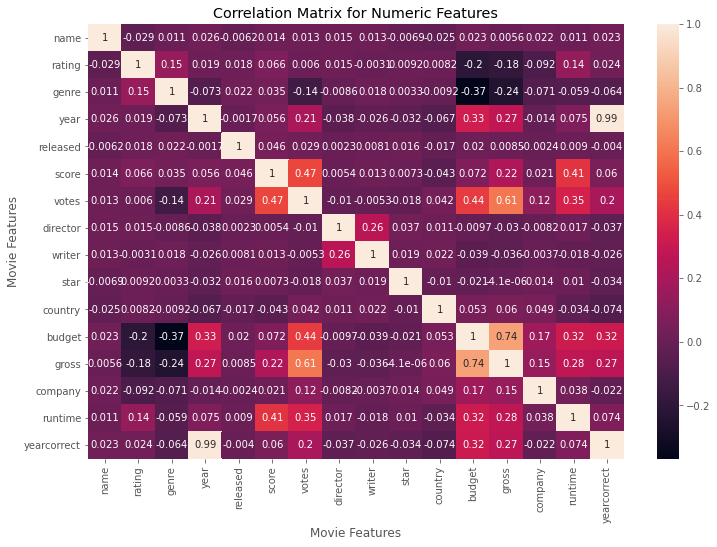

In [27]:
correlation_matrix = df_numerised.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [29]:
correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.023234
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [31]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.074422
yearcorrect  country       -0.074422
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        yearcorrect   -0.064308
yearcorrect  genre         -0.064308
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [35]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.990417
year         yearcorrect    0.990417
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest to gross earnings

# Company has low correlation